# Exercise 1

***

## Part 1

Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

***

In [1]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as stats

# Show combinations
import itertools

# Generate random numbers
import random

# Plotting.
import matplotlib.pyplot as plt

# Math module.
import math

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

The lady tea test is a simple count of the number of successes in selecting the 4 cups (the number of cups of the given type successfully selected). The distribution of possible numbers of successes can be computed using the number of combinations. Using the combination formula, with n=8 total cups and k=4 cups chosen, there are:

<br>
$${8 \choose 4} = \frac{8!}{4!(8-4)!} = 70$$<br>
<br>
possible combinations.
Here, the first part of the equation means 8 choose 4.[02] 

![lady_tea](img/lady_tea.png)

**Fig 1:** Possible outcomes of the "lady tasting tea" experiment.

The following is adapted from https://stackoverflow.com/a/4941932

In the imports section above. We imported the math module of python becuase we are going to need the math.comb method.

The math.comb() method, also known as combinations, returns the number of ways to choose k unordered outcomes from n possibilities without repetition.[01]

**Parameters**

**n**: The positive integers of items from which to choose

**k**: The positive integers of items to choose

In [2]:
# Number of ways of selecting 4 cups from 8.
math.comb(8, 4)

70

This is another way of writing the mathematical formula above, but this time using python.<br>
The probability of randomly selecting the correct 4 cups is:

In [3]:
1.0 / math.comb(8, 4)

0.014285714285714285

We can say that if the experiment was done with 8 cups total, four with milk in first and four with tea in first, then the chance of selecting correctly randomly is about 1.5%. <br>
Now let's have a look at the number of ways of selecting 5 cups from 10.

In [4]:
math.comb(10, 5)

252

The probability of randomly selecting correct 5 cups is:

In [5]:
1.0 / math.comb(10, 5)

0.003968253968253968

So, if the experiment was done with 10 cups total, five with milk in first and five with tea in first, then the chance of selecting correctly randomly is much less than 1%.

Of course, we could design the experiment to have 9 cups in total, with 4 with milk in first and 5 with tea in first - or vice versa.

In [6]:
# Number of ways of selecting 4 cups from 9.
math.comb(9, 4)

126

In [7]:
# The probability is then:
1.0 / math.comb(9, 4)

0.007936507936507936

This is less than 1% too.

Note that the number of ways of selecting 5 cups from 9 is:

In [8]:
math.comb(9, 5)

126

This is because with 9 cups, we are segregating them into groups of 4 and 5. 4 with the milk in first and 5 with the tea in first or vice versa. So 9 choose 4 is the same as 9 choose 5 because of the way that the 2 groups of cups are separated.


### *Bonus Question:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

As per above, the number of ways of selecting 4 cups from 8 is:

In [9]:
math.comb(8, 4)

70

For the lady to get all 4 cups correct, there is clearly only one set of four choices (namely, choosing all four correct cups). This is where the 1 comes from in the numerator:

In [10]:
1.0/70.0

0.014285714285714285

But to allow the lady to get one cup wrong, the sets of for choices are 4 choose 3 and 4 choose 1. 

In [11]:
math.comb(4, 3)

4

In [12]:
math.comb(4, 1)

4

Thus a selection of any one correct cup and any three correct cups can occur in any of 4×4 = 16 ways. [03]

In [13]:
16.0/70.0

0.22857142857142856

Therefore, the lady has a greater than 20% chance to get 3/4 cups correct. For the lady to get one cup wrong while maintaining the 1% threshold, the number of cups would have to be increased in the experiment. Let's try with 10 cups overall.[03]

In [14]:
math.comb(10, 5)

252

To allow the lady to get one cup wrong, the sets of for choices are 5 choose 4 and 5 choose 1. 

In [15]:
math.comb(5, 4)

5

In [16]:
math.comb(5, 1)

5

Thus a selection of any one correct cup and any four correct cups can occur in any of 5×5 = 25 ways. [03]

In [17]:
25.0/252.0

0.0992063492063492

The lady has less around 10% chance to get 4/5 cups correct.

Let's try with 12 cups. 

In [18]:
math.comb(12, 6)

924

In [19]:
math.comb(6, 5)

6

In [20]:
math.comb(6, 1)

6

Thus a selection of any one correct cup and any four correct cups can occur in any of 6×6 = 36 ways. [03]

In [21]:
36.0/924.0

0.03896103896103896

The lady has less around 3% chance to get 5/6 cups correct.

Let's bump the number of cups up to 16. 

In [22]:
math.comb(16, 8)

12870

In [23]:
math.comb(8, 7)

8

In [24]:
math.comb(8, 1)

8

Thus a selection of any one correct cup and any four correct cups can occur in any of 8×8 = 64 ways. [03]

In [25]:
64.0/12870.0

0.004972804972804973

The lady has less around 0.5% chance to get 7/8 cups correct.

Now let's see if we do some code to generate a visuallisation of this.

Below we have given each of the eight cups a label from 0 to 15. Note that the cups have no order in the experiment, we are labelling them with integers simply for convenience.

In [26]:
# The 16 cups.

cups = list(range(16))
cups

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

We can now store the possibilities that can be enumerated using the combinations function from the itertools Python package in a variable called `poss`.[08]

In [27]:
poss = list(itertools.combinations(cups, 8))

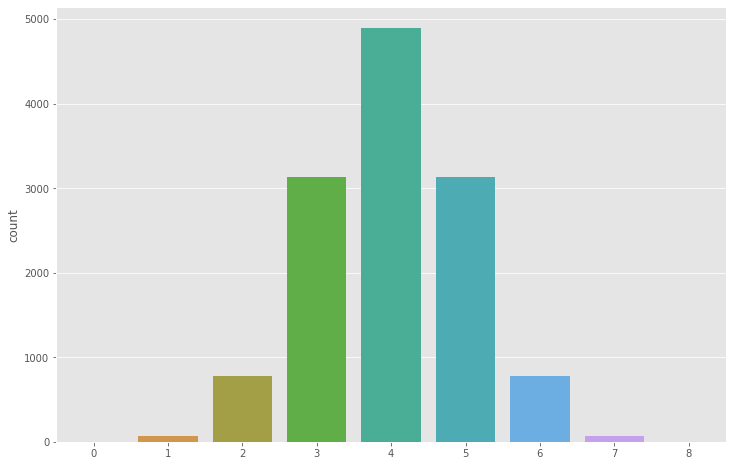

In [28]:
# Pick a random correct answer from the list of 70 to simulate the experiment.
milkfirst = set(random.choice(poss))

# Count the overlap between the correct answer, and each of the 70 possiblities.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 8)]

# Creat the plot.
sns.countplot(x=counts);

## Part 2

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.
***

Scipy's version of Fisher's exact test is a scipy method that performs a Fisher exact test on a 2x2 contingency table. A contingency table displays frequencies for combinations of two categorical variables. They can also be refered to as crosstabulation and two-way tables. Contingency tables classify outcomes for one variable in rows and the other in columns. The values at the row and column intersections are frequencies for each unique combination of the two variables. [06]<br>
So, for the lady tea tasting experiment, for the lady to guess all four cups correctly, The below contingency table (table 1) illustrates `scipy.stats.fisher_exact`.

|| Actual Tea | Actual Milk |
| :- | -: | :-: |
| Selected Tea | 4 | 0|
| Selected Milk | 0 | 4|

<div align="center"><b>Table 1:</b> contingency table for the lady to select 4/4 correct cups.[04]</div>

The 'Actual Tea' refers to the tea with the tea in first and is the correct answer. 'The Actual Milk' refers to the tea with the milk in first and is the correct answer. The 'Selected Tea' refers to the tea with the tea in first that the lady selects. The 'Selected Milk' refers to the tea with the milk in first that the lady selects. <br>


`scipy.stats.fisher_exact` takes in 2 paramaters. 'Table', which is a 2x2 contingency table and 'alternative' which needs to be explored below. Let's start by importing scipy statistical methods.

In [29]:
# Statistical methods.
import scipy.stats as ss

In [30]:
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

We can see from the above code that the default of the parameter 'alternative' is 'two sided'. Let's insert the contingency table for the lady to guess 4 cups correctly as the first parameter in `scipy.stats.fisher_exact`

In [31]:
ss.fisher_exact([[4, 0], [0, 4]])

(inf, 0.028571428571428536)

The answer looks to be 2 times the value that we got from using `math.comb()` from the first section of this notebook.

In [32]:
# Answer from section one multiplied by 2.
0.014285714285714285 * 2

0.02857142857142857

To explore this, I changed the default parameters as seen below:

In [33]:
ss.fisher_exact([[4, 0], [0, 4]], alternative = 'less')

(inf, 1.0)

In [34]:
ss.fisher_exact([[4, 0], [0, 4]], alternative = 'greater')

(inf, 0.014285714285714268)

It seems that when the 'alternative' parameter is changed to 'greater', we are getting the target answer that was confirmed in the first section.

The first value returned is called the oddsratio and the second value returned is the p-value which the probability. <br>
Let's first define the oddsratio to better understand this.

|Column 1| Column 2 |
| :- | -: | 
| a | b |
| c | d | 

<div align="center"><b>Table 2:</b> Generic contingency table.</div>

The odds ratio is calculated directly from the table (table 2):
<br>
$$\text{Odds Ratio} = \frac{\frac{a}{b}}{\frac{c}{d}} = \frac{ad}{bc}$$<br>
<br>

This explains why we see inf in this case. It happens when either of the letters are 0.[07]

In [35]:
ss.fisher_exact([[3, 1], [1, 3]], alternative = 'greater')

(9.0, 0.24285714285714263)

We can see above that when we use non-zero numbers in the table that the odds ration is an integer.

Going back to the alternative 'parameter', there are two types of alternative. Two-sided and one-sided. The two types of one-sided are 'less' and 'greater'. [07] They are also sometimes known as left and right tailed. A 'Two-sided' Fisher’s Exact Test is when the null hypothesis odds ratio is equal to 1 and the alternative hypothesis is not equal to 1. A 'Less' Fisher’s Exact Test is when the null hypothesis odds ratio is greater than or equal to 1 and the alternative hypothesis is less than 1. A 'Greater' Fisher’s Exact Test is when the null hypothesis odds ratio is less than or equal to 1 and the alternative hypothesis is greater than 1. See the below summary of alternatives[07]:

**Two-sided Fisher’s Exact Test:**<br>
ho: The odds ratio is equal to 1<br>
ha: The odds ratio is not equal to 1<br>
**“Less” Fisher’s Exact Test:**<br>
ho: The odds ratio ≥ 1<br>
ha: The odds ratio is <1<br>
**“Greater” Fisher’s Exact Test:**<br>
ho: The odds ratio is ≤1<br>
ha: The odds ratio is > 1<br>

This means that for the lady to get all cups correct and for the experiment to have the same result as using `math.comb()` as in section one, the alternative hypothesis must be that the odds ratio is greater than 1.

## Exercise 2
***

- Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. <br>
- Improve it in any way you think it could be improved.

***

A t-test is an inferential statistic used to assess whether there is a significant difference between the means of two groups and their relationships. When data sets have a normal distribution and unknown variances, t-tests are used [12] <br>
To perform a t-test, we need three essential data values. The mean difference, the standard deviation of each group, and the total number of data values for each group, as well as the difference between the mean values from each data set.<br>
An example of using the t-test would be some researchers want to know whether or not two different species of plants have the same mean height. To test this, they collect a simple random sample of 20 plants from each species.[13]

In [36]:
# Generate random number generator (rng) using numpy
rng = np.random.default_rng(42)

Let's start with the first paramaters `a` and `b`. `a` is an array of sample observations for group 1, and `b` an array of sample observations for group 2.

The `scipy.stats.norm` function creates a normal continuous random variable. It has many different methods that can be used. rvs (Random variates), pdf (Probability density function), logpdf (Log of the probability density function), cdf (	
Cumulative distribution function) etc.[09]

See below examples using the pdf method.

In [37]:
pdf1 = stats.norm.pdf(x=2)
pdf1

0.05399096651318806

In [38]:
pdf2 = stats.norm.pdf(x=8, loc=5, scale=1)
pdf2

0.0044318484119380075

The `loc` parameter is the mean and the `scale` parameter is the standard deviation. The `x` variable is specific to the pdf function and we won't need it for the examples that are in `scipy.stats.ttest_ind`.

The default parameters for `rsv` are `rvs(loc=0, scale=1, size=1, random_state=None)`

`Size` is the size of the array.

Let's create a variable and look at it.

In [39]:
rvs1 = stats.norm.rvs(loc=0, scale=1, size=5, random_state=None)
rvs1

array([ 0.21784039, -0.1204883 ,  0.28645573, -1.07534434, -0.07430136])

We can use the random number generator that we created above in the `random state` parameter.

In [40]:
rvs2 = stats.norm.rvs(loc=0, scale=1, size=5, random_state=rng)
rvs2

array([ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472, -1.95103519])

Let's bump the size up to 500 for each of these variables so that we can use them as our `a` and `b` parameters.

In [41]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

Above are two randomly generated Normal distributions with mean=1 and standard deviation=10.

Below is a performance of a standard independent 2 sample test that assumes equal population variances. This is because the parameter `equal_var` is set to true by default. [10]

In [42]:
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.3675656260184975, pvalue=0.713275082711144)

We can see above that the p-value is above 0.05. Generally and alpha value is chosen at around 0.5. An alpha value is a criterion for acceptance. [14] In most cases, a 5% value can be assumed. We can see above that the p-value is over 5% so we can reject the null hypothesis. 
If it is set to false, then a Welch’s t-test is performed instead and it does not assume equal population variance. [11] Student's t-test assumes that the sample means being compared for two populations are normally distributed, and that the populations have equal variances. Welch's t-test is designed for unequal population variances, but the assumption of a normal distribution maintained. Welch's t-test is an approximate solution to the Behrens–Fisher problem. [12]

In [43]:
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.3675656260184975, pvalue=0.7132751958216259)

The formulas for calculating the Welch's t-test are: <br>
$$\text{T Value} = \frac{mean1 - mean2}{\sqrt{(\frac{var1}{n1} + \frac{var2}{n2})}}$$<br>
$$\text{Degrees of Freedom} = \frac{(\frac{var1^2}{n1} + \frac{var2^2}{n2})^2}{\frac{(\frac{var1^2}{n1})}{n1-1} + \frac{(\frac{var2^2}{n2})}{n2-1}}$$

Where *var1* and *var1* = Variance of each of the sample sets <br>
*n1* and *n2* = Number of records in each sample set (`size`). <br>
See lecture notes for formalu of the student's t-test where the variances are assumed to be the same.

Let's do another test where the standard deviation is 20 for one of the samples.

In [44]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-0.12272150447433998, pvalue=0.9023523424290409)

In [45]:
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-0.12272150447433998, pvalue=0.9023622750360023)

We can see above that the welch's t-test underestimates p. <br>

Now let's test it when the sample sizes are different, i.e. when one of the sample sizes is 500 and the other is 100. The standard deviations will also be different, the firs is 10 and the second is 20.

In [46]:
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=3.5015166827821496, pvalue=0.0004971041437930139)

In [47]:
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=2.2123658805310313, pvalue=0.029050967928541557)

We can see above that the equal variance t-statistic (student's t-test) is no longer equal to the unequal variance t-statistic (Welch's t-test). <br>
Now let's try it with a different means, variance, and size. <br>
Sample 1 : mean=5, standard deviation=10, size=500 <br>
Sample 2 : mean=8, standard deviation=20, size=100 

In [48]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-1.0237015168788652, pvalue=0.3063902094181567)

In [49]:
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-0.6473425943985983, pvalue=0.5187864578940679)

We can see above that the equal variance t-statistic (student's t-test) is no longer equal to the unequal variance t-statistic (Welch's t-test), similar to the test where the mean and size were different.<br>
Let's now change the `permutations` parameter. Using the Student's t-test. We'll use the `rng` to ensure reproducibility.

In [50]:
stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)

Ttest_indResult(statistic=-1.0237015168788652, pvalue=0.3111)

In calculating the inferential test, if `permutations` is specified then the inferential test is based on an empirical bootstrap distribution of potential test statistics that could result from the same data pool but assigned to sample 1 or sample 2 at random. This inferential test does not make strong assumptions about the populations from which the data samples come.

If `permutations` is not specified then the inferential test is based on a theoretical distribution of potential test statistics that could arise if the two data samples come from populations which conform to certain parametric assumptions (normal distribution, and so forth). [15]

***

## References

***

[01][python-programs.com - Python math.comb() Method with Examples](https://python-programs.com/python-math-comb-method-with-examples/)<br>
[02][handwiki.org - Lady Tasting Tea](https://handwiki.org/wiki/Lady_tasting_tea)<br>
[03][Wikipedia - Lady tasting tea](https://en.wikipedia.org/wiki/Lady_tasting_tea)<br>
[04][Tables in Markdown (in Jupyter)](https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter)<br>
[05][docs.scipy.org - scipy.stats.fisher_exact](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html)<br>
[06][statisticsbyjim.com - Contingency Table: Definition, Examples & Interpreting](https://statisticsbyjim.com/basics/contingency-table/)<br>
[07][towardsdatascience.com - Fully Mastering Fisher’s Exact Test for A/B Testing](https://towardsdatascience.com/fishers-exact-fb49432e55b5)<br>
[08][GitHub Ian McLoughlin - 01-statistics.ipynb](https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/01-statistics.ipynb)<br>
[09][scipy.org - scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=norm)<br>
[10][Wikipedia - Independent two-sample t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)<br>
[11][Wikipedia - Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test)<br>
[12][Python Scipy ttest_ind – Complete Guide](https://pythonguides.com/python-scipy-ttest_ind/)<br>
[13][Statology - How to Conduct a Two Sample T-Test in Python](https://www.statology.org/two-sample-t-test-python/)<br>
[14][Investopedia - T-Test: What It Is With Multiple Formulas and When To Use Them](https://www.investopedia.com/terms/t/t-test.asp)<br>
[15][Stackoverflow - Scipy ttest_ind permutation test changed by equal_var parameter?](https://stackoverflow.com/questions/69136100/scipy-ttest-ind-permutation-test-changed-by-equal-var-parameter)<br>
